# Laboratório #6

### Instruções

1. Quando você terminar os exercícios do laboratório, vá ao menu do Jupyter ou Colab e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb. 
    * Este deve ser o arquivo que você irá entregar.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
2. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.

**Nome**:

**Matrícula**:

## Exercícios

#### 1)  Neste exercício, você irá utilizar a classe `Perceptron` da biblioteca SciKit-Learn para realizar a operação lógica AND com dados de entrada ruidosos. Esta operação pode ser vista como uma tarefa de classificação.

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos de duas classes.

**DICAS**

+ Notem que na célula abaixo, o conjunto de dados já é dividido em conjuntos de treinamento e validação e na sequência, as matrizes de atributos de treinamento e validação são criadas.
+ Percebam que as matrizes de atributos seguem o formato da equação do hiperplano: $g(x) = a_0 + a_1x_1 + a_2x_2$.

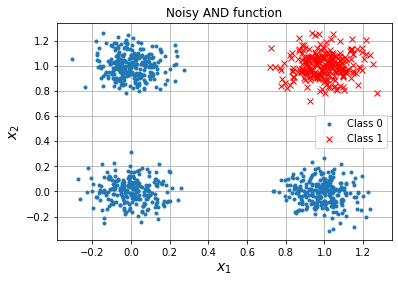

In [17]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score

# Reset PN sequence generator.
seed = 0
np.random.seed(seed)

# Number of examples.
N = 1000

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function: x1 AND x2.
y = x1 & x2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attribute vectors.
X = np.c_[x1, x2]

# Split array into random train and validation subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Creating the attribute matrices.
X_train = np.c_[np.ones((len(y_train), 1)), X_train]
X_test = np.c_[np.ones((len(y_test), 1)), X_test]

# Plot the two classes.
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)
plt.plot(X[idx0.ravel(),0], X[idx0.ravel(),1], '.', label='Class 0')
plt.plot(X[idx1.ravel(),0], X[idx1.ravel(),1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy AND function')
plt.legend()
plt.grid()
plt.show()

2. Observando a figura acima, responda:

+ As duas classes são linearmente separáveis? (**Justifique sua resposta.**)

<span style="color:blue">Escreva aqui a resposta do exercício.</span>

**Resposta**

3. Treine um perceptron usando uma instância da classe `Perceptron` da biblioteca SciKit-Learn com o **conjunto de treinamento** criado no item 1 deste exercício.

**DICAS**

+ Não se esqueça de configurar o parâmetro `fit_intercept` da classe `Perceptron` com o valor `False`, pois o vetor de bias já foi adicionado quando criamos as matrizes de atributos.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [1]:
# Digite aqui o código do exercício.

4. Calcule e imprima a acurácia do perpectron usando o **conjunto de validação** criado no item 1 deste exercício.

**DICAS**
+ Use a função `accuracy_score` da biblioteca SciKit-Learn para calcular a acurácia do perceptron.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [2]:
# Digite aqui o código do exercício.

5. Crie uma figura mostrando as regiões de decisão do perceptron.

**DICA**

+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [3]:
# Digite aqui o código do exercício.

4. Plote a matriz de confusão do perceptron para os exemplos do **conjunto de validação**.

**DICA**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).

In [4]:
# Digite aqui o código do exercício.

#### 2)  Neste exercício, você irá combinar alguns perceptrons para realizar a operação lógica XNOR com dados de entrada ruidosos. Esta operação pode ser vista como uma tarefa de classificação.

A função lógica XNOR (Exclusive NOR), ou seja, o complemento da lógica XOR, é dada pela tabela abaixo.

| Input |   |  Output  |
|:-----:|:-:|:--------:|
|   A   | B | A XNOR B |
|   0   | 0 |     1    |
|   0   | 1 |     0    |
|   1   | 0 |     0    |
|   1   | 1 |     1    |

A função lógica XNOR pode ser reescrita em função de operações mais simples assim como fizemos com a função lógica XOR. A função lógica XNOR pode ser reescrita da seguinte forma:

```python
XNOR = ~(A ^ B) = (A | ~B) & (~A | B)
```

Observando a expressão acima, verificamos que existem três operações principais: 2 operações lógicas OR e uma AND. 

Sabemos que essas duas operações lógicas podem ser implementadas por classificadores lineares, pois os dados são **linearmente separáveis**.

Portanto, podemos treinar três perceptrons diferentes para realizar cada uma destas operações e ao final combinar seus resultados para se obter a classificação do lógica XNOR.

A figura abaixo mostra a combinação necessária dos três perceptrons para que a a lógica XNOR seja implementada.

<img src="../figures/xnor_perceptrons.png" width="500" height="500">

1. Execute a célula abaixo e analise a figura gerada. A figura mostra os exemplos das duas classes.

**DICAS**

+ Notem que na célula abaixo as seguintes informações já são geradas:
    * Matriz de atributos $\textbf{X}$, a qual será utilizada como entrada para os dois primeiros perceptrons.
    * Vetores $\textbf{y}_1$ e $\textbf{y}_2$ com as saídas esperadas dos dois primeiros perceptrons.
    * Matriz de atributos $\textbf{X}_3$, a qual será utilizada como entrada para último perceptron.
    * Vetor $\textbf{y}_3$ com a saída esperada do último perceptron.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

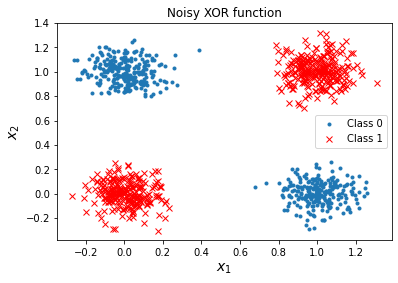

In [6]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, accuracy_score

# Number of examples.
N = 1000

# Reset PN sequence generator.
seed = 42
np.random.seed(seed)

# Create attributes.
x1 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)
x2 = np.random.randint(0,2,N, dtype=bool).reshape(N,1)

# Target function (desired final output).
y = ~(x1 ^ x2)

# Labels of the first perceptron.
y1 = x1 | (~x2)

# Labels of the second perceptron.
y2 = (~x1) | x2

# Attributes and labels of the third perceptron.
X3 = np.c_[y1, y2]
y3 = y1 & y2

# Add noise to the attributes.
x1 = x1 + 0.1*np.random.randn(N,1)
x2 = x2 + 0.1*np.random.randn(N,1)

# Concatenate attributes.
X = np.c_[x1, x2]

# Plot the two classes.
idx0 = np.argwhere(y.ravel() == 0)
idx1 = np.argwhere(y.ravel() == 1)
plt.plot(x1[idx0.ravel()], x2[idx0.ravel()], '.', label='Class 0')
plt.plot(x1[idx1.ravel()], x2[idx1.ravel()], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('Noisy XOR function')
plt.legend()
plt.show()

2. Divida a matrix de atributos $\textbf{X}$ e o vetor $\textbf{y}_1$ em conjuntos de treinamento e validação e, em seguida, crie as matrizes de atributos de treinamento e validação para o **primeiro perceptron**.

**DICAS**

+ Divida o conjunto total de amostras em 70% para treinamento e 30% para validação.
+ Por definição, as matrizes de atributos passadas para o perceptron devem seguir a equação do hiperplano: $g(x) = a_0 + a_1 x_1 + a_2 x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [5]:
# Digite aqui o código do exercício.

3. Treine o **primeiro perceptron** e imprima sua acurácia. Este perceptron deve implementar a seguinte expressão lógica
```python
y1 =  x1 | ~x2
```

**DICAS**

+ Não se esqueça de configurar o parâmetro `fit_intercept` da classe `Perceptron` com o valor `False`, pois o vetor de bias já foi adicionado quando as matrizes de atributos foram criadas.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [6]:
# Digite aqui o código do exercício.

4. Divida a matrix de atributos $\textbf{X}$ e o vetor $\textbf{y}_2$ em conjuntos de treinamento e validação e, em seguida, crie as matrizes de atributos de treinamento e validação para o **segundo perceptron**.

**DICAS**

+ Divida o conjunto total de amostras em 70% para treinamento e 30% para validação.
+ Por definição, as matrizes de atributos passadas para o perceptron devem seguir a equação do hiperplano: $g(x) = a_0 + a_1 x_1 + a_2 x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [7]:
# Digite aqui o código do exercício.

5. Treine o **segundo perceptron** e imprima sua acurácia. Este perceptron deve implementar a seguinte expressão lógica
```python
y1 =  ~x1 | x2
```

**DICAS**

+ Não se esqueça de configurar o parâmetro `fit_intercept` da classe `Perceptron` com o valor `False`, pois o vetor de bias já foi adicionado quando as matrizes de atributos foram criadas.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [8]:
# Digite aqui o código do exercício.

6. Divida a matrix de atributos $\textbf{X}_3$ e o vetor $\textbf{y}_3$ em conjuntos de treinamento e validação e, em seguida, crie as matrizes de atributos de treinamento e validação para o **terceiro perceptron**.

**DICAS**

+ Divida o conjunto total de amostras em 70% para treinamento e 30% para validação.
+ Por definição, as matrizes de atributos passadas para o perceptron devem seguir a equação do hiperplano: $g(x) = a_0 + a_1 x_1 + a_2 x_2$.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [9]:
# Digite aqui o código do exercício.

7. Treine o **terceiro perceptron** e imprima sua acurácia. Este perceptron deve implementar a seguinte expressão lógica
```python
y1 =  y1 & y2
```

**DICAS**

+ Não se esqueça de configurar o parâmetro `fit_intercept` da classe `Perceptron` com o valor `False`, pois o vetor de bias já foi adicionado quando as matrizes de atributos foram criadas.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [10]:
# Digite aqui o código do exercício.

8. Usando a classe `Classifier` abaixo, imprima a acurácia obtida através da combinação dos três perceptrons. Use o conjunto total de dados, ou seja, $\textbf{X}$ e $\textbf{y}$, para calcular a acurácia.

**DICAS**

+ Não se esqueça de executar a célula abaixo para definir a classe `Classifier` e poder utilizá-la.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [13]:
class Classifier():
    '''Classe que combina três perceptrons para realizar uma classificação não-linear.'''
    
    def __init__(self, per1, per2, per3):
        '''Construtor da classe.'''
        self.per1 = per1
        self.per2 = per2
        self.per3 = per3
        
    def predict(self, X):
        '''Realia predições utilizando a combinação dos três perceptrons.'''
        N = X.shape[0]
        y1 = self.per1.predict(X).reshape(N,1)
        y2 = self.per2.predict(X).reshape(N,1)
        X3 = np.c_[np.ones((len(y1), 1)), y1, y2]
        y3 = self.per3.predict(X3)
        return y3

In [11]:
# Digite aqui o código do exercício.

9. Crie uma figura mostrando as regiões de decisão obtida com a combinação dos três perceptrons.

**DICA**

+ A matriz de atributos criada para plotar as regiões de decisão também deve ter a mesma forma que as matrizes de atributos criadas para o treinamento e validação.
+ Para resolver este item, se baseie no código do seguinte exemplo: [perceptron_xor_problem.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/perceptron_xor_problem.ipynb).

In [12]:
# Digite aqui o código do exercício.

10. Plote a matriz de confusão obtida com a combinação dos três perceptrons. Use o conjunto total de dados, ou seja, $\textbf{X}$ e $\textbf{y}$, para plotar a matriz.

**DICAS**

+ Para resolver este item, se baseie no código do seguinte exemplo: [classification_metrics.ipynb](https://colab.research.google.com/github/zz4fap/t320_aprendizado_de_maquina/blob/main/notebooks/classificação/classification_metrics.ipynb).

In [13]:
# Digite aqui o código do exercício.